In [ ]:
import time
import numpy as np
import torch
import torch.nn.functional as F
from torchvision import datasets
from torchvision import transforms
from torchvision.utils import save_image
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
import os
%matplotlib inline


if torch.cuda.is_available():
    torch.backends.cudnn.deterministic = True


# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
if torch.cuda.is_available():
  print("Got the fast")

In [ ]:
# Hyperparameters
random_seed = 168
generator_learning_rate = 0.0025
discriminator_learning_rate = 0.0001
num_epochs = 300
batch_size = 4
image_size = 64
norm = (0.5, 0.5, 0.5), (0.5, 0.5, 0.5)
seed_size = 64
LATENT_DIM = 100




train_dataset = datasets.ImageFolder('/content/drive/MyDrive/SMT', transform=transforms.ToTensor())


normal_dataset = datasets.ImageFolder('/content/drive/MyDrive/SMT', transform=
    transforms.Compose([
    transforms.Resize(image_size),
    transforms.CenterCrop(image_size),
    transforms.ToTensor(),
    transforms.Normalize(*norm)]))

# Augment the dataset with mirrored images
mirror_dataset = datasets.ImageFolder('/content/drive/MyDrive/SMT', transform=transforms.Compose([
    transforms.Resize(image_size),
    transforms.CenterCrop(image_size),
    transforms.RandomHorizontalFlip(p=1.0),
    transforms.ToTensor(),
    transforms.Normalize(*norm)]))

# Augment the dataset with color changes
color_jitter_dataset = datasets.ImageFolder('/content/drive/MyDrive/SMT', transform=transforms.Compose([
    transforms.Resize(image_size),
    transforms.CenterCrop(image_size),
    transforms.ColorJitter(0.5, 0.5, 0.5),
    transforms.ToTensor(),
    transforms.Normalize(*norm)]))

# Combine the datasets
dataset_list = [normal_dataset, mirror_dataset, color_jitter_dataset]
dataset = torch.utils.data.ConcatDataset(dataset_list)


train_loader = DataLoader(dataset=dataset, 
                          batch_size=batch_size, 
                          shuffle=True)

test_loader = DataLoader(dataset=dataset, 
                         batch_size=batch_size, 
                         shuffle=False)

# Checking the dataset
for images, labels in train_loader:  
    print('Image batch dimensions:', images.shape)
    print('Image label dimensions:', labels.shape)
    break

Image batch dimensions: torch.Size([4, 3, 64, 64])
Image label dimensions: torch.Size([4])


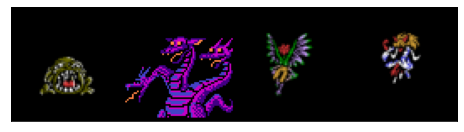

In [ ]:
def denormalize(image):
  return image * norm[1][0] + norm[0][0]
def show_images(images, nmax=64):
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(make_grid(images.detach()[:nmax], nrow=8).permute(1, 2, 0))
    
def show_batch(dataloader, nmax=64):
    for images, _ in dataloader:
        show_images(denormalize(images), nmax)
        break

show_batch(train_loader)

In [ ]:
##########################
### MODEL
##########################


class GAN(torch.nn.Module):

    def __init__(self):
        super(GAN, self).__init__()
        
        
        self.generator = nn.Sequential(
            # nn.Linear(LATENT_DIM, 128),
            # nn.LeakyReLU(inplace=True),
            # nn.Dropout(p=0.5),
            # nn.Linear(128, image_size),
            # nn.Tanh()

            # nn.ConvTranspose2d(seed_size, 512, kernel_size=4, padding=0, stride=1, bias=False),
            # nn.BatchNorm2d(512),
            # nn.ReLU(True),
            # nn.ConvTranspose2d(512, 256, kernel_size=4, padding=1, stride=2, bias=False),
            # nn.BatchNorm2d(256),
            # nn.ReLU(True),
            # nn.ConvTranspose2d(256, 128, kernel_size=4, padding=1, stride=2, bias=False),
            # nn.BatchNorm2d(128),
            # nn.ReLU(True),
            # nn.ConvTranspose2d(128, 64, kernel_size=4, padding=1, stride=2, bias=False),
            # nn.BatchNorm2d(64),
            # nn.ReLU(True),
            # nn.ConvTranspose2d(64, 32, kernel_size=4, padding=1, stride=2, bias=False),
            # nn.BatchNorm2d(32),
            # nn.ReLU(True),
            # nn.ConvTranspose2d(32, 16, kernel_size=4, padding=1, stride=2, bias=False),
            # nn.BatchNorm2d(16),
            # nn.ReLU(True),
            # nn.ConvTranspose2d(16, 3, kernel_size=4, padding=1, stride=2, bias=False),
            # nn.Tanh()


            nn.ConvTranspose2d(seed_size, 128, kernel_size=4, padding=0, stride=1, bias=False),
            nn.BatchNorm2d(128),
            nn.ReLU(True),
            nn.ConvTranspose2d(128, 128, kernel_size=4, padding=1, stride=2, bias=False),
            nn.BatchNorm2d(128),
            nn.ReLU(True),
            nn.ConvTranspose2d(128, 128, kernel_size=4, padding=1, stride=2, bias=False),
            nn.BatchNorm2d(128),
            nn.ReLU(True),
            nn.ConvTranspose2d(128, 64, kernel_size=4, padding=1, stride=2, bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU(True),
            nn.ConvTranspose2d(64, 3, kernel_size=4, padding=1, stride=2, bias=False),
            nn.Tanh()

        )
        
        self.discriminator = nn.Sequential(
            # nn.Linear(image_size, 128),
            # nn.LeakyReLU(inplace=True),
            # nn.Dropout(p=0.5),
            # nn.Linear(128, 1),
            # nn.Sigmoid()

            # nn.Conv2d(3, 16, kernel_size=4, stride=2, padding=4, bias=False),
            # nn.BatchNorm2d(16),
            # nn.LeakyReLU(0.3, inplace=True),
            # nn.Dropout(p=0.5),
            # nn.Conv2d(16, 32, kernel_size=4, stride=2, padding=4, bias=False),
            # nn.BatchNorm2d(32),
            # nn.LeakyReLU(0.3, inplace=True),
            # nn.Dropout(p=0.5),
            # nn.Conv2d(32, 64, kernel_size=4, stride=2, padding=4, bias=False),
            # nn.BatchNorm2d(64),
            # nn.LeakyReLU(0.3, inplace=True),
            # nn.Dropout(p=0.5),
            # nn.Conv2d(64, 128, kernel_size=4, stride=2, padding=4, bias=False),
            # nn.BatchNorm2d(128),
            # nn.LeakyReLU(0.3, inplace=True),
            # nn.Dropout(p=0.5),
            # nn.Conv2d(128, 256, kernel_size=4, stride=2, padding=4, bias=False),
            # nn.BatchNorm2d(256),
            # nn.LeakyReLU(0.3, inplace=True),
            # nn.Dropout(p=0.5),
            # nn.Conv2d(256, 512, kernel_size=4, stride=2, padding=4, bias=False),
            # nn.BatchNorm2d(512),
            # nn.LeakyReLU(0.3, inplace=True),
            # nn.Dropout(p=0.5),
            # nn.Conv2d(512, 1, kernel_size=4, stride=1, padding=0, bias=False),
            # nn.Flatten(),
            # nn.Sigmoid()


            nn.Conv2d(3, 64, kernel_size=4, stride=2, padding=1, bias=False),
            nn.BatchNorm2d(64),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(p=0.5),
            nn.Conv2d(64, 128, kernel_size=4, stride=2, padding=1, bias=False),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(p=0.5),
            nn.Conv2d(128, 128, kernel_size=4, stride=2, padding=1, bias=False),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(p=0.5),
            nn.Conv2d(128, 128, kernel_size=4, stride=2, padding=1, bias=False),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(p=0.5),
            nn.Conv2d(128, 1, kernel_size=4, stride=1, padding=0, bias=False),
            nn.Flatten(),
            nn.Sigmoid()
        )

            
    def generator_forward(self, z):
        img = self.generator(z)
        return img
    
    def discriminator_forward(self, img):
        pred = model.discriminator(img)
        return pred.view(-1)

In [ ]:
torch.manual_seed(random_seed)

model = GAN()
model = model.to(device)

optim_gener = torch.optim.Adam(model.generator.parameters(), lr=generator_learning_rate)
optim_discr = torch.optim.Adam(model.discriminator.parameters(), lr=discriminator_learning_rate)

In [ ]:
start_time = time.time()    

discr_costs = []
gener_costs = []
for epoch in range(num_epochs):
    model = model.train()
    for batch_idx, (features, targets) in enumerate(train_loader):

        # show_images(denormalize(features[1]))


        features = (features - 0.5)*2.
        # features = features.view(-1, image_size).to(device) 
        # print(features.shape)
        targets = targets.to(device)
        # setup a vector of 1's for the real images and a vector of 0's for the fake images
        valid = torch.ones(768).float().to(device)
        fake = torch.zeros(768).float().to(device)
        
      
        
        # --------------------------
        # Train Generator
        # --------------------------
        
        # Generate new images from random noise
        # Make new images
        # z = torch.zeros((targets.size(0), LATENT_DIM)).uniform_(-1.0, 1.0).to(device)
        z = torch.randn(batch_size, seed_size, 1, 1, device=device)
        # //Try 64 instead of batch size
        generated_features = model.generator_forward(z)
        
        # Loss for fooling the discriminator
        discr_pred = model.discriminator_forward(generated_features)
        
        gener_loss = F.binary_cross_entropy(discr_pred, valid[0:discr_pred.shape[0]])
         
        # use separate optimizers for generator and discrimator - 1 - go back to the second TODO
        optim_gener.zero_grad()
        gener_loss.backward()
        optim_gener.step()
        
        # --------------------------
        # Train Discriminator
        # --------------------------        
        
        # train discrimininator to recongnize real images as real
        discr_pred_real = model.discriminator_forward(features.to(device))
        real_loss = F.binary_cross_entropy(discr_pred_real, valid[0:discr_pred_real.shape[0]])
        
        # train discriminiator to reconginze generated images as fake
        discr_pred_fake = model.discriminator_forward(generated_features.detach())
        fake_loss = F.binary_cross_entropy(discr_pred_fake, fake[0:4])
        
        # combine fake & real parts
        discr_loss = 0.5*(real_loss + fake_loss)

        # use separate optimizers for generator and discrimator - 2 - go back to the second TODO
        optim_discr.zero_grad()
        discr_loss.backward()
        optim_discr.step()        
        
        discr_costs.append(discr_loss.item())
        gener_costs.append(gener_loss.item())
        
        
        ### LOGGING
        if not batch_idx % 100:
            print ('Epoch: %03d/%03d | Batch %03d/%03d | Gen/Dis Loss: %.4f/%.4f' 
                   %(epoch+1, num_epochs, batch_idx, 
                     len(train_loader), gener_loss, discr_loss))
        



    print('Time elapsed: %.2f min' % ((time.time() - start_time)/60))
    fixed_latent_batch = torch.randn(20, seed_size, 1, 1, device=device)
    batch = model.generator_forward(fixed_latent_batch)
    fake_file = "result-image-{0:0=4d}.png".format(epoch)
    # Save the image
    save_image(denormalize(batch), os.path.join("/content/drive/MyDrive/Results", fake_file), nrow=8)
    print("Result Saved!")
    
print('Total Training Time: %.2f min' % ((time.time() - start_time)/60))

Epoch: 001/300 | Batch 000/291 | Gen/Dis Loss: 0.7394/0.6116
Epoch: 001/300 | Batch 100/291 | Gen/Dis Loss: 1.1594/0.3539
Epoch: 001/300 | Batch 200/291 | Gen/Dis Loss: 0.5651/0.4775
Time elapsed: 0.88 min
Result Saved!
Epoch: 002/300 | Batch 000/291 | Gen/Dis Loss: 3.0455/0.1669
Epoch: 002/300 | Batch 100/291 | Gen/Dis Loss: 3.1950/0.3115
Epoch: 002/300 | Batch 200/291 | Gen/Dis Loss: 3.1126/0.0688
Time elapsed: 1.77 min
Result Saved!
Epoch: 003/300 | Batch 000/291 | Gen/Dis Loss: 1.8794/0.3135
Epoch: 003/300 | Batch 100/291 | Gen/Dis Loss: 2.8851/0.1509
Epoch: 003/300 | Batch 200/291 | Gen/Dis Loss: 3.5436/0.0478
Time elapsed: 2.67 min
Result Saved!
Epoch: 004/300 | Batch 000/291 | Gen/Dis Loss: 4.6933/0.0211
Epoch: 004/300 | Batch 100/291 | Gen/Dis Loss: 5.3878/0.0125
Epoch: 004/300 | Batch 200/291 | Gen/Dis Loss: 3.6011/0.0095
Time elapsed: 3.58 min
Result Saved!
Epoch: 005/300 | Batch 000/291 | Gen/Dis Loss: 1.4777/0.2283
Epoch: 005/300 | Batch 100/291 | Gen/Dis Loss: 0.0893/1.043

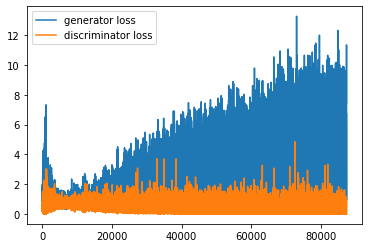

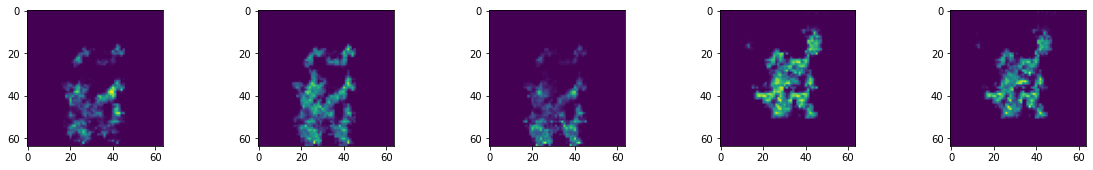

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(range(len(gener_costs)), gener_costs, label='generator loss')
plt.plot(range(len(discr_costs)), discr_costs, label='discriminator loss')
plt.legend()
plt.show()

##########################
### VISUALIZATION
##########################


model.eval()
# Make new images
# z = torch.zeros((5, LATENT_DIM)).uniform_(-1.0, 1.0).to(device)
# generated_features = model.generator_forward(z)

z = torch.randn(batch_size, seed_size, 1, 1, device=device)
generated_features = model.generator_forward(z)
imgs = generated_features.view(-1, 64, 64)

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 2.5))


for i, ax in enumerate(axes):
    axes[i].imshow(imgs[i].to(torch.device('cpu')).detach(), cmap='viridis')